# Spam Email Detection

This notebook performs the spam email detection task from the midterm exam. It includes:

- Data loading
- Feature processing
- Logistic Regression model training
- Model evaluation
- Prediction for custom emails
- Data visualizations

In [2]:
import pandas as pd
import numpy as np

# Load the CSV file (update the path to your file)
data = pd.read_csv("a_dolidze25_51892.csv")

# Show first rows
data.head()

,words,links,capital_words,spam_word_count,is_spam
0,217,2,3,2,0
1,73,0,3,1,0
2,145,2,7,2,0
3,133,1,2,2,0
4,30,1,3,0,0


In [3]:
from sklearn.model_selection import train_test_split

X = data[['words', 'links', 'capital_words', 'spam_word_count']]
y = data['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Model coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coef_df


,Feature,Coefficient
0,words,0.008641
1,links,0.876716
2,capital_words,0.442592
3,spam_word_count,0.749321


Confusion Matrix:
 [[366  14]
 [ 20 350]]
Accuracy: 0.9546666666666667


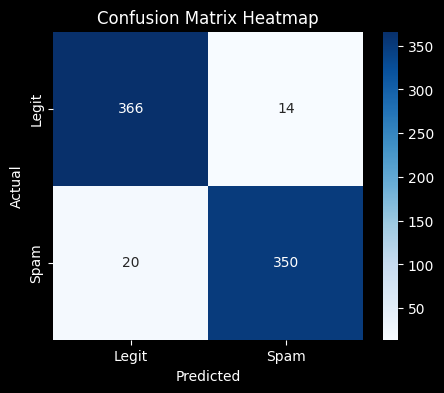

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Heatmap visualization
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit','Spam'], yticklabels=['Legit','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [7]:
def extract_features(email_text):
    words = len(email_text.split())
    links = email_text.count("http")
    capital_words = sum(1 for w in email_text.split() if w.isupper())
    spam_words = sum(1 for w in email_text.lower().split() if w in ['free','win','prize','buy','cash'])
    return [[words, links, capital_words, spam_words]]

# Test with custom email
email = "WIN a FREE prize now! Click http://spam.com"
features = extract_features(email)
prediction = model.predict(features)[0]
print("Spam" if prediction==1 else "Legit")


Legit


C:\python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


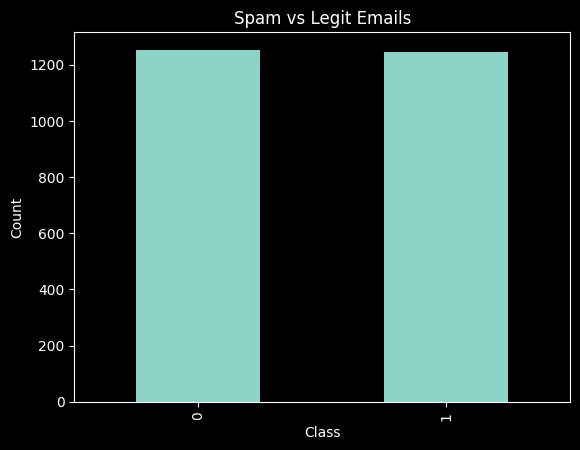

In [8]:
data['is_spam'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Spam vs Legit Emails')
plt.show()


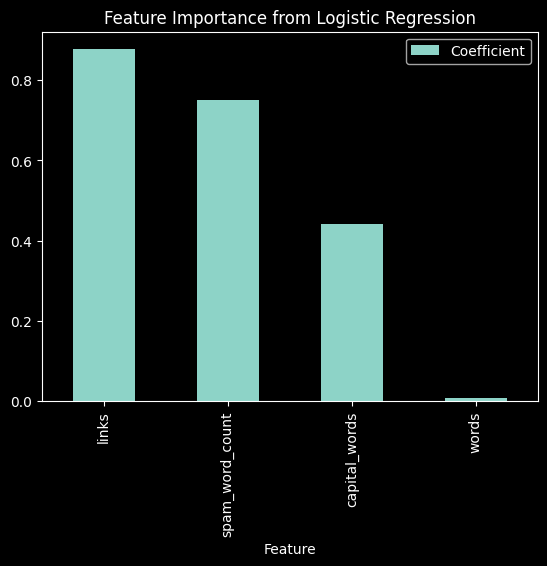

In [9]:
coef_df.sort_values('Coefficient', ascending=False).plot(kind='bar', x='Feature', y='Coefficient')
plt.title('Feature Importance from Logistic Regression')
plt.show()

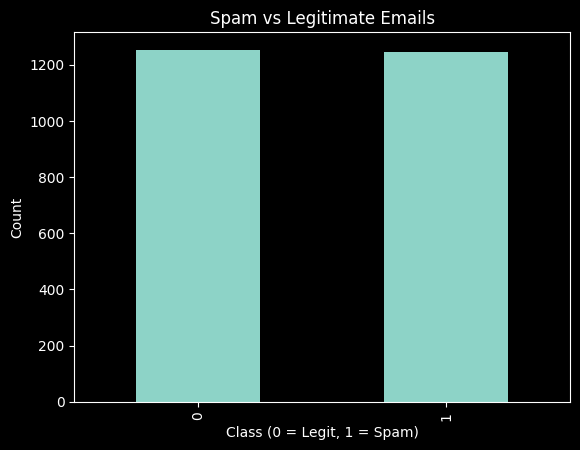

In [10]:
import matplotlib.pyplot as plt

plt.figure()
data["is_spam"].value_counts().plot(kind="bar")
plt.title("Spam vs Legitimate Emails")
plt.xlabel("Class (0 = Legit, 1 = Spam)")
plt.ylabel("Count")

plt.savefig("class_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


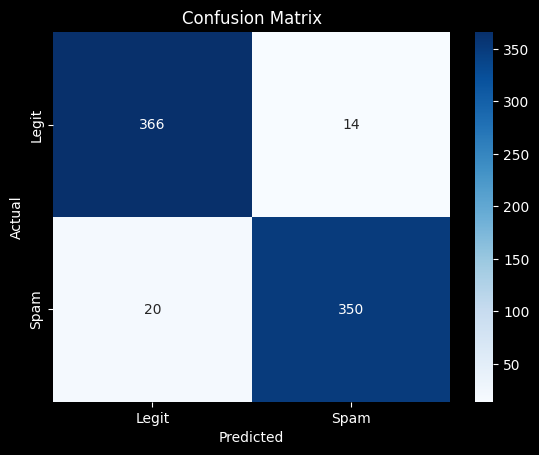

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Legit", "Spam"],
            yticklabels=["Legit", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()
